# 00_explore_datasets_cassava

**Objective:**  
Explore and validate the Cassava Leaf Disease Classification dataset:
- Understand dataset structure (CSV, JSON, and image folders)  
- Check data consistency between labels and files  
- Visualize class distribution  
- Display random labeled samples


Label mapping comes from label_num_to-disease_map.json:

{
  "0": "Cassava Bacterial Blight (CBB)",
  "1": "Cassava Brown Streak Disease (CBSD)",
  "2": "Cassava Green Mottle (CGM)",
  "3": "Cassava Mosaic Disease (CMD)",
  "4": "Healthy"
}


In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import random

# Use your actual dataset path
DATA_DIR = Path(r"C:\Users\User\Desktop\Data Science\Projects\crop-disease-detection\data\raw\cassava-leaf-disease-classification")

# Define file paths
TRAIN_DIR = DATA_DIR / "train_images"
TEST_DIR = DATA_DIR / "test_images"
TRAIN_CSV = DATA_DIR / "train.csv"
LABEL_MAP = DATA_DIR / "label_num_to_disease_map.json"

print("✅ Base path:", DATA_DIR)
print("Train images:", len(list(TRAIN_DIR.glob('*.jpg'))))
print("Test images:", len(list(TEST_DIR.glob('*.jpg'))))
print("Files:", os.listdir(DATA_DIR))


✅ Base path: C:\Users\User\Desktop\Data Science\Projects\crop-disease-detection\data\raw\cassava-leaf-disease-classification
Train images: 21397
Test images: 1
Files: ['label_num_to_disease_map.json', 'sample_submission.csv', 'test_images', 'test_tfrecords', 'train.csv', 'train_images', 'train_tfrecords']


Load CSV and Label Map

In [10]:
with open(LABEL_MAP, 'r') as f:
    label_map = json.load(f)  # Load label mapping

label_map = {int(k): v for k, v in label_map.items()}  # Convert keys to int
    
df = pd.read_csv(TRAIN_CSV)
df["label_name"] = df["label"].map(label_map)  # Map label numbers to names

print("✅ Loaded CSV with shape:", df.shape)
print("Sample data:")
print(df.head())


✅ Loaded CSV with shape: (21397, 3)
Sample data:
         image_id  label                           label_name
0  1000015157.jpg      0       Cassava Bacterial Blight (CBB)
1  1000201771.jpg      3         Cassava Mosaic Disease (CMD)
2   100042118.jpg      1  Cassava Brown Streak Disease (CBSD)
3  1000723321.jpg      1  Cassava Brown Streak Disease (CBSD)
4  1000812911.jpg      3         Cassava Mosaic Disease (CMD)


Check for missing or duplicate values

In [11]:
# Check for missing image files listed in train.csv
image_files = {p.name for p in TRAIN_DIR.glob("*.jpg")}
missing_files = set(df["image_id"]) - image_files

print("🟡 Missing images:", len(missing_files))
print("✅ Unique image IDs:", df["image_id"].nunique())
print("✅ Duplicate rows:", df.duplicated().sum())


🟡 Missing images: 0
✅ Unique image IDs: 21397
✅ Duplicate rows: 0


Class distribution

C:\Users\User\AppData\Local\Temp\ipykernel_3668\867206205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label_name", order =  df["label_name"].value_counts().index, palette="viridis")


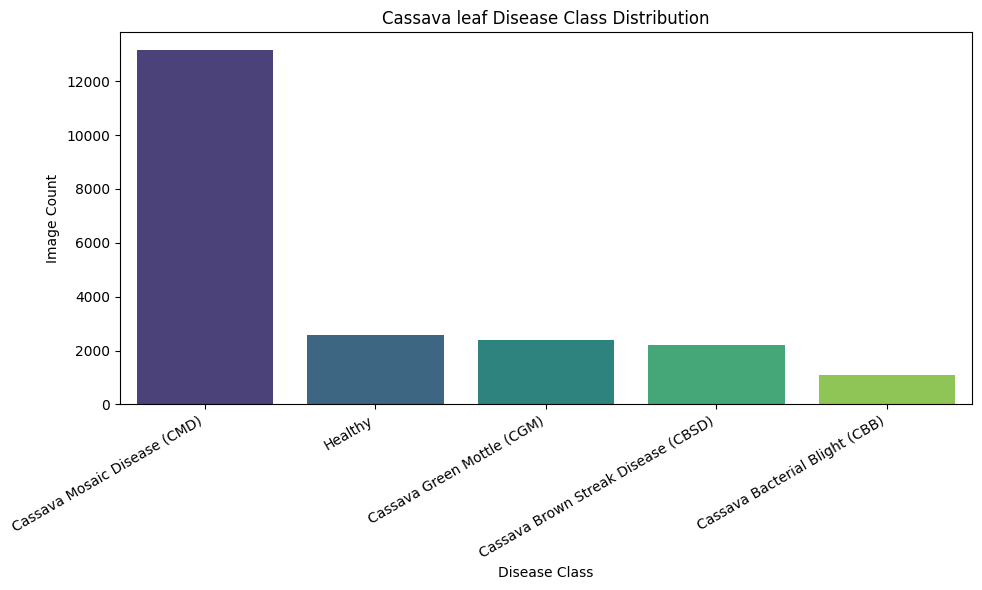

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="label_name", order =  df["label_name"].value_counts().index, palette="viridis")
plt.title("Cassava leaf Disease Class Distribution")
plt.xticks(rotation=30, ha='right')
plt.xlabel("Disease Class")
plt.ylabel("Image Count")
plt.tight_layout()
plt.show()

Dataset is heavily imbalanced. Training Strategy Implications

Use class weights in your loss function
(e.g., torch.nn.CrossEntropyLoss(weight=...) in PyTorch).

Or oversample minority classes during training using WeightedRandomSampler.

Alternatively, use data augmentation (rotations, brightness shifts, etc.) to synthetically balance the smaller classes.

Validation Strategy

When splitting, make sure to use stratified splits (so every subset keeps the same class ratios).

Display random samples

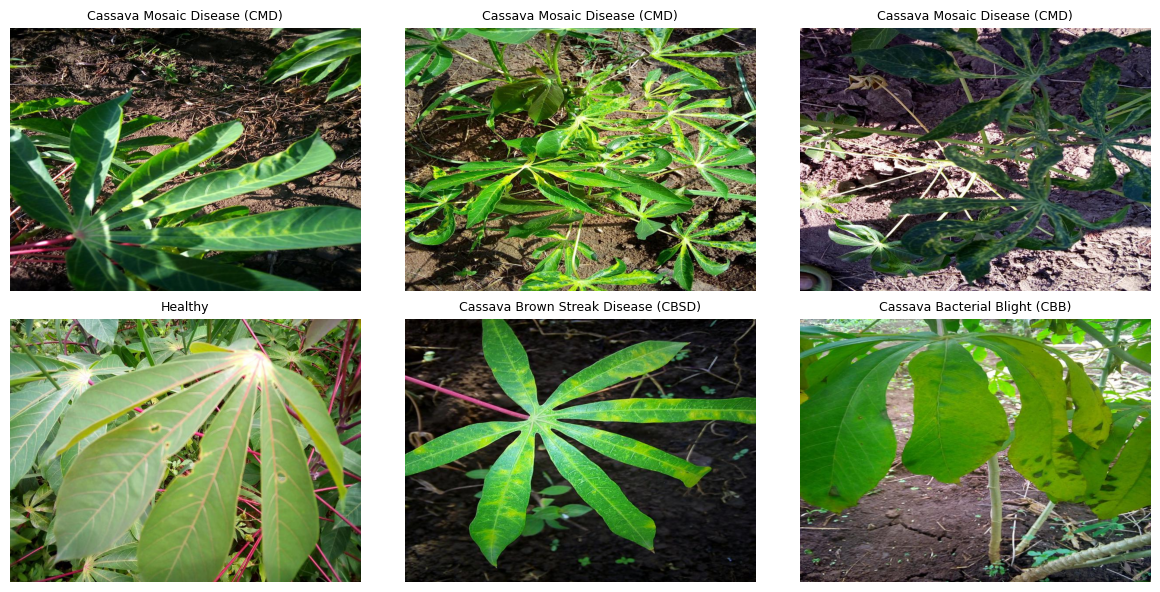

In [13]:
def show_random_samples(n=6):
    """Show 'n' random labeled images from the training set."""
    samples = df.sample(n)
    plt.figure(figsize=(12, 6))

    for i, row in enumerate(samples.itertuples()):
        img_path = TRAIN_DIR / row.image_id
        img = Image.open(img_path)
        plt.subplot(2, n//2, i+1)
        plt.imshow(img)
        plt.title(row.label_name, fontsize=9)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

show_random_samples(6)


Basic image property checks

In [14]:
sample_img = Image.open(next(TRAIN_DIR.glob("*.jpg")))
print(f"Image size: {sample_img.size}, mode: {sample_img.mode}")


Image size: (800, 600), mode: RGB


##  Summary

- Dataset loaded successfully with consistent CSV and JSON mapping.  
- Found all training images in `train_images/`.  
- Dataset contains 5 distinct classes:  
  - Cassava Bacterial Blight (CBB)  
  - Cassava Brown Streak Disease (CBSD)  
  - Cassava Green Mottle (CGM)  
  - Cassava Mosaic Disease (CMD)  
  - Healthy  
- The test set contains only **1 public image** (Kaggle placeholder).  
- Ready for preprocessing and model training.
